In [2]:
import numpy as np
import pandas as pd
!pip install scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install xgboost
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

RANDOM_STATE = 55 ## We will pass it to every sklearn call so we ensure reproducibility

In [3]:
X_train=pd.read_csv("train.csv")
X_test=pd.read_csv("test.csv")
X_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
X_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
X_train.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,9280_02,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Anton Woody,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [6]:
X_train.info

<bound method DataFrame.info of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  

In [7]:
X_train.replace('?', np.nan, inplace=True)
X_test.replace('?', np.nan, inplace=True)
X_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
missing_data_train=X_train.isnull()
missing_data_train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
for column in missing_data_train.columns.values.tolist():
    print(column)
    print(missing_data_train[column].value_counts())
    print(" ")

PassengerId
PassengerId
False    8693
Name: count, dtype: int64
 
HomePlanet
HomePlanet
False    8492
True      201
Name: count, dtype: int64
 
CryoSleep
CryoSleep
False    8476
True      217
Name: count, dtype: int64
 
Cabin
Cabin
False    8494
True      199
Name: count, dtype: int64
 
Destination
Destination
False    8511
True      182
Name: count, dtype: int64
 
Age
Age
False    8514
True      179
Name: count, dtype: int64
 
VIP
VIP
False    8490
True      203
Name: count, dtype: int64
 
RoomService
RoomService
False    8512
True      181
Name: count, dtype: int64
 
FoodCourt
FoodCourt
False    8510
True      183
Name: count, dtype: int64
 
ShoppingMall
ShoppingMall
False    8485
True      208
Name: count, dtype: int64
 
Spa
Spa
False    8510
True      183
Name: count, dtype: int64
 
VRDeck
VRDeck
False    8505
True      188
Name: count, dtype: int64
 
Name
Name
False    8493
True      200
Name: count, dtype: int64
 
Transported
Transported
False    8693
Name: count, dtype: int64
 


In [10]:
X_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [11]:
avg_age=X_train["Age"].mean()
X_train["Age"]=X_train["Age"].fillna(avg_age)

In [12]:
missing_data_test=X_test.isnull()
for column in missing_data_test.columns.values.tolist():
    print(column)
    print(missing_data_test[column].value_counts())
    print(" ")

PassengerId
PassengerId
False    4277
Name: count, dtype: int64
 
HomePlanet
HomePlanet
False    4190
True       87
Name: count, dtype: int64
 
CryoSleep
CryoSleep
False    4184
True       93
Name: count, dtype: int64
 
Cabin
Cabin
False    4177
True      100
Name: count, dtype: int64
 
Destination
Destination
False    4185
True       92
Name: count, dtype: int64
 
Age
Age
False    4186
True       91
Name: count, dtype: int64
 
VIP
VIP
False    4184
True       93
Name: count, dtype: int64
 
RoomService
RoomService
False    4195
True       82
Name: count, dtype: int64
 
FoodCourt
FoodCourt
False    4171
True      106
Name: count, dtype: int64
 
ShoppingMall
ShoppingMall
False    4179
True       98
Name: count, dtype: int64
 
Spa
Spa
False    4176
True      101
Name: count, dtype: int64
 
VRDeck
VRDeck
False    4197
True       80
Name: count, dtype: int64
 
Name
Name
False    4183
True       94
Name: count, dtype: int64
 


In [13]:
avg_age=X_test["Age"].mean()
X_test["Age"]=X_test["Age"].fillna(avg_age)

In [14]:
avg_RoomService=X_train["RoomService"].mean()
X_train["RoomService"]=X_train["RoomService"].fillna(avg_RoomService)

In [15]:
avg_FoodCourt=X_train["FoodCourt"].mean()
X_train["FoodCourt"]=X_train["FoodCourt"].fillna(avg_FoodCourt)

In [16]:
avg_ShoppingMall=X_train["ShoppingMall"].mean()
X_train["ShoppingMall"]=X_train["ShoppingMall"].fillna(avg_ShoppingMall)

In [17]:
avg_Spa=X_train["Spa"].mean()
X_train["Spa"]=X_train["Spa"].fillna(avg_Spa)

In [18]:
avg_VRDeck=X_train["VRDeck"].mean()
X_train["VRDeck"]=X_train["VRDeck"].fillna(avg_VRDeck)

In [19]:
avg_RoomService=X_test["RoomService"].mean()
X_test["RoomService"]=X_test["RoomService"].fillna(avg_RoomService)

avg_FoodCourt=X_test["FoodCourt"].mean()
X_test["FoodCourt"]=X_test["FoodCourt"].fillna(avg_FoodCourt)

avg_ShoppingMall=X_test["ShoppingMall"].mean()
X_test["ShoppingMall"]=X_test["ShoppingMall"].fillna(avg_ShoppingMall)

avg_Spa=X_test["Spa"].mean()
X_test["Spa"]=X_test["Spa"].fillna(avg_Spa)

avg_VRDeck=X_test["VRDeck"].mean()
X_test["VRDeck"]=X_test["VRDeck"].fillna(avg_VRDeck)

In [20]:
X_train["HomePlanet"].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [21]:
X_train["HomePlanet"]=X_train["HomePlanet"].fillna(X_train["HomePlanet"].value_counts().idxmax())

In [22]:
X_train["HomePlanet"].isnull().value_counts()

HomePlanet
False    8693
Name: count, dtype: int64

In [23]:
X_train["CryoSleep"].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [24]:
X_train["CryoSleep"]=X_train["CryoSleep"].fillna(X_train["CryoSleep"].value_counts().idxmax())

C:\Users\rishi\AppData\Local\Temp\ipykernel_12388\2145735759.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train["CryoSleep"]=X_train["CryoSleep"].fillna(X_train["CryoSleep"].value_counts().idxmax())


In [25]:
X_train["CryoSleep"].isnull().value_counts()

CryoSleep
False    8693
Name: count, dtype: int64

In [26]:
X_train["Cabin"].value_counts()

Cabin
G/734/S     8
F/1194/P    7
B/201/P     7
G/981/S     7
G/109/P     7
           ..
E/56/P      1
A/98/P      1
G/1499/S    1
G/1500/S    1
D/252/P     1
Name: count, Length: 6560, dtype: int64

In [27]:
X_train["Cabin"]=X_train["Cabin"].fillna(X_train["Cabin"].value_counts().idxmax())

In [28]:
X_train["Cabin"].isnull().value_counts()

Cabin
False    8693
Name: count, dtype: int64

In [29]:
X_train[["Deck", "Cabin_num", "Side"]]=X_train["Cabin"].str.split('/', expand=True)

In [30]:
X_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [31]:
X_train.drop(['Cabin'], axis=1, inplace=True)

In [32]:
X_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [33]:
X_train["Cabin_num"]=X_train["Cabin_num"].astype('int')

In [34]:
X_train["Destination"].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [35]:
X_train["Destination"]=X_train["Destination"].fillna(X_train["Destination"].value_counts().idxmax())

In [36]:
X_train["VIP"].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [37]:
X_train["VIP"]=X_train["VIP"].fillna(X_train["VIP"].value_counts().idxmax())

C:\Users\rishi\AppData\Local\Temp\ipykernel_12388\2083050034.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train["VIP"]=X_train["VIP"].fillna(X_train["VIP"].value_counts().idxmax())


In [38]:
X_train["VIP"].isnull().value_counts()

VIP
False    8693
Name: count, dtype: int64

In [39]:
X_train["Deck"].isnull().value_counts()

Deck
False    8693
Name: count, dtype: int64

In [40]:
X_train.drop(["Name", "PassengerId"], axis=1, inplace=True)

In [41]:
X_test["HomePlanet"]=X_test["HomePlanet"].fillna(X_test["HomePlanet"].value_counts().idxmax())

X_test["CryoSleep"]=X_test["CryoSleep"].fillna(X_test["CryoSleep"].value_counts().idxmax())

X_test["Cabin"]=X_test["Cabin"].fillna(X_test["Cabin"].value_counts().idxmax())

X_test[["Deck", "Cabin_num", "Side"]]=X_test["Cabin"].str.split('/', expand=True)

X_test.drop(['Cabin'], axis=1, inplace=True)

X_test["Cabin_num"]=X_test["Cabin_num"].astype('int')

X_test["Destination"]=X_test["Destination"].fillna(X_test["Destination"].value_counts().idxmax())

X_test["VIP"]=X_test["VIP"].fillna(X_test["VIP"].value_counts().idxmax())

X_test.drop(["Name", "PassengerId"], axis=1, inplace=True)

C:\Users\rishi\AppData\Local\Temp\ipykernel_12388\3614468642.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test["CryoSleep"]=X_test["CryoSleep"].fillna(X_test["CryoSleep"].value_counts().idxmax())
C:\Users\rishi\AppData\Local\Temp\ipykernel_12388\3614468642.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test["VIP"]=X_test["VIP"].fillna(X_test["VIP"].value_counts().idxmax())


In [42]:
cat_variables=[
    "HomePlanet",
    "Destination",
    "Deck",
    "Side"
]


In [43]:
X_train=pd.get_dummies(data=X_train, prefix=cat_variables, columns=cat_variables)

In [44]:
X_test=pd.get_dummies(data=X_test, prefix=cat_variables, columns=cat_variables)

In [45]:
y_train=X_train["Transported"]

In [46]:
X_train.drop(["Transported"], axis=1, inplace=True)

In [47]:
X_train_t, X_train_v, y_train_t, y_train_v=train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE)

In [48]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]
RANDOM_STATE=55

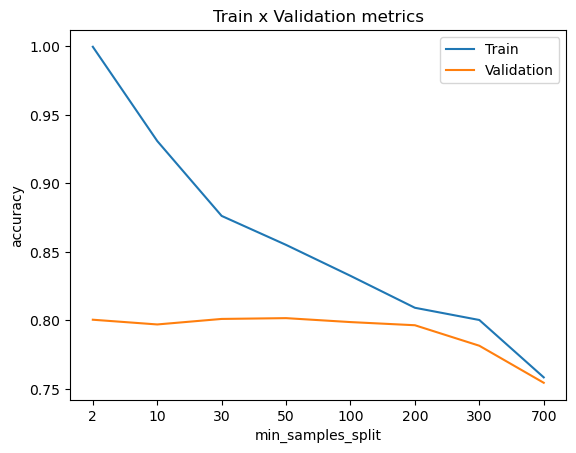

In [49]:
accuracy_list_train = []
accuracy_list_val = []
for min_samples_split in min_samples_split_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = RANDOM_STATE).fit(X_train_t,y_train_t) 
    predictions_train = model.predict(X_train_t) ## The predicted values for the train dataset
    predictions_val = model.predict(X_train_v) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train_t)
    accuracy_val = accuracy_score(predictions_val,y_train_v)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

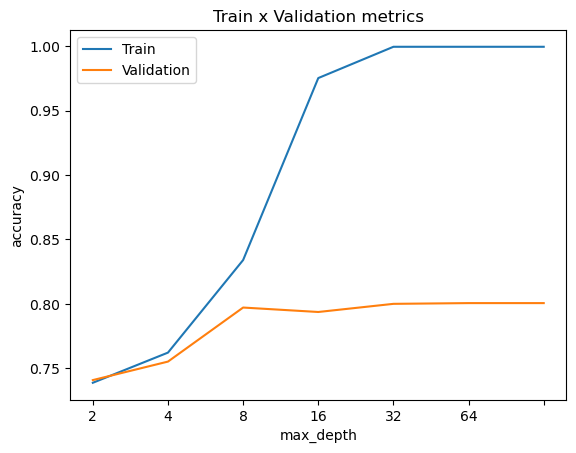

In [50]:
accuracy_list_train = []
accuracy_list_val = []
for max_depth in max_depth_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = RANDOM_STATE).fit(X_train_t,y_train_t) 
    predictions_train = model.predict(X_train_t) ## The predicted values for the train dataset
    predictions_val = model.predict(X_train_v) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train_t)
    accuracy_val = accuracy_score(predictions_val,y_train_v)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

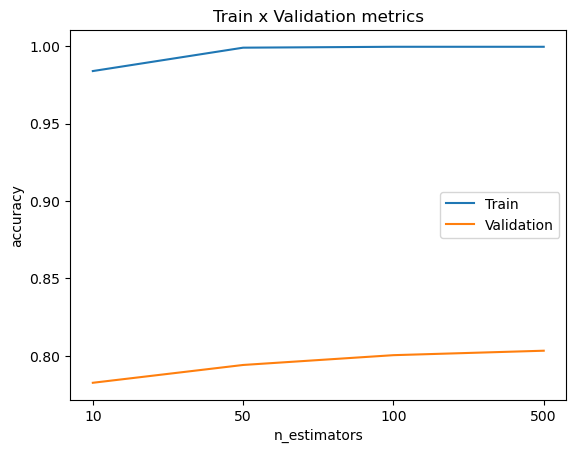

In [51]:
accuracy_list_train = []
accuracy_list_val = []
for n_estimators in n_estimators_list:
    # You can fit the model at the same time you define it, because the fit function returns the fitted estimator.
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = RANDOM_STATE).fit(X_train_t,y_train_t) 
    predictions_train = model.predict(X_train_t) ## The predicted values for the train dataset
    predictions_val = model.predict(X_train_v) ## The predicted values for the test dataset
    accuracy_train = accuracy_score(predictions_train,y_train_t)
    accuracy_val = accuracy_score(predictions_val,y_train_v)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_val.append(accuracy_val)

plt.title('Train x Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_val)
plt.legend(['Train','Validation'])

In [52]:
rf=RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_split=50).fit(X_train, y_train)

In [53]:
yhat=rf.predict(X_test)
yhat

array([ True, False,  True, ...,  True,  True,  True], shape=(4277,))

In [54]:
X_test_output=pd.read_csv("test.csv")
X_test_output.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [55]:
passenger_ids=X_test_output["PassengerId"]

In [56]:
passenger_ids.head()

0    0013_01
1    0018_01
2    0019_01
3    0021_01
4    0023_01
Name: PassengerId, dtype: object

In [57]:
submission=pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": yhat
})

In [58]:
submission.to_csv('submission.csv', index=False)

In [59]:
submission.shape

(4277, 2)

In [60]:
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    verbosity=1,
    random_state=RANDOM_STATE
)

xgb_model.fit(
    X_train_t, y_train_t,
    eval_set=[(X_train_v, y_train_v)],
)


[0]	validation_0-logloss:0.65344
[1]	validation_0-logloss:0.62088
[2]	validation_0-logloss:0.59416
[3]	validation_0-logloss:0.57120
[4]	validation_0-logloss:0.55181
[5]	validation_0-logloss:0.53463
[6]	validation_0-logloss:0.52012
[7]	validation_0-logloss:0.50728
[8]	validation_0-logloss:0.49611
[9]	validation_0-logloss:0.48645
[10]	validation_0-logloss:0.47853
[11]	validation_0-logloss:0.47159
[12]	validation_0-logloss:0.46540
[13]	validation_0-logloss:0.45819
[14]	validation_0-logloss:0.45340
[15]	validation_0-logloss:0.44835
[16]	validation_0-logloss:0.44242
[17]	validation_0-logloss:0.43874
[18]	validation_0-logloss:0.43573
[19]	validation_0-logloss:0.43158
[20]	validation_0-logloss:0.42882
[21]	validation_0-logloss:0.42610
[22]	validation_0-logloss:0.42374
[23]	validation_0-logloss:0.42105
[24]	validation_0-logloss:0.41892
[25]	validation_0-logloss:0.41648
[26]	validation_0-logloss:0.41472
[27]	validation_0-logloss:0.41316
[28]	validation_0-logloss:0.41181
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [61]:
yhat_2=xgb_model.predict(X_test)
yhat_2=yhat_2.astype('bool')
yhat_2

array([ True, False,  True, ...,  True,  True, False], shape=(4277,))

In [62]:
submission_2=pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": yhat_2
})

In [63]:
submission_2.to_csv("submission_2.csv", index=False)

In [64]:
rf_2=RandomForestClassifier(n_estimators=500, max_depth=8, min_samples_split=200).fit(X_train, y_train)

In [65]:
yhat_3=rf_2.predict(X_test)

In [66]:
yhat_3

array([ True, False,  True, ...,  True,  True,  True], shape=(4277,))

In [67]:
submission_3=pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": yhat_3
})

In [68]:
submission_3.to_csv("submission_3.csv", index=False)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    #Train Model and Predict  
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train_t,y_train_t)
    yhat = knn_model_n.predict(X_train_v)
    acc[n-1] = accuracy_score(yhat, y_train_v)
    std_acc[n-1] = np.std(yhat==y_train_v)/np.sqrt(yhat.shape[0])

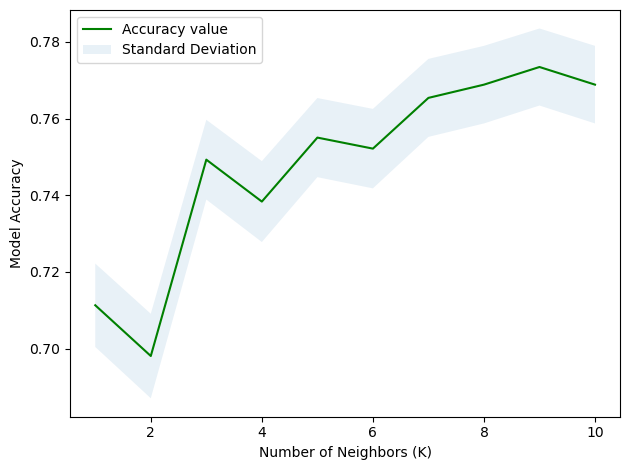

In [73]:
plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy value', 'Standard Deviation'))
plt.ylabel('Model Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [75]:
knn=KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
yhat_4=knn.predict(X_test)
yhat

array([False, False,  True, ...,  True,  True, False], shape=(1739,))

In [76]:
submission_4=pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": yhat_4
})

In [77]:
submission_4.to_csv("submission_4.csv", index=False)

In [ ]:
import xgboost
print(xgboost.__version__)

In [ ]:
X_test.head()

In [ ]:
X_train.head()

In [ ]:
X_train.dtypes